##                            `Decision tree`

A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It is a popular and intuitive model that resembles a flowchart or tree-like structure. Decision trees are used to make decisions or predictions by recursively splitting the dataset into subsets based on the most significant attributes or features.

Here's how a decision tree works:

1. **Root Node**: At the beginning, you have a single node called the "root node" that represents the entire dataset.

2. **Splitting**: The decision tree algorithm evaluates different attributes (features) and selects the one that, when used as a decision criterion, results in the best separation of the data into subsets. This process is repeated at each internal node of the tree.

3. **Internal Nodes**: Internal nodes in the tree represent decisions or conditions based on the chosen attribute. For example, if you were building a decision tree to classify animals, an internal node might ask, "Is it a mammal?"

4. **Branches**: Each branch emerging from an internal node represents one of the possible outcomes or values for that attribute. For instance, if the decision is based on whether an animal is a mammal, you would have two branches: "Yes" and "No."

5. **Leaves (Terminal Nodes)**: The terminal nodes, often referred to as "leaves," represent the final classification or prediction. In the animal example, the leaves might specify the animal's species or group.

6. **Recursive Process**: The process of splitting the data into subsets and creating new internal nodes continues recursively until certain stopping criteria are met. These criteria might include a maximum depth for the tree, a minimum number of samples in a leaf node, or other factors.

7. **Predictions**: To make a prediction or classification for a new data point, you traverse the tree from the root node down to a leaf node, following the path that corresponds to the values of the attributes for that data point. The class or value associated with the leaf node is the final prediction.

Decision trees have several advantages, including simplicity and interpretability, as they closely resemble human decision-making processes. However, they can be prone to overfitting when they become too complex. To address this issue, techniques like pruning and using ensemble methods such as Random Forests are often employed. Decision trees are widely used in various fields, including finance, healthcare, and natural language processing, due to their versatility and ease of use.

In [1]:
#LOAD THE LIB
#EDA
#Feature eng.--->encoding(label,one-hot,ordinal),recaling etc
#feature selection--->cor,chi,rfe,vif,pca,lda,svd etc
#model building
#model prediction
#hyperparamter tuning
#model evalution
#model deployment

In [2]:
#!pip install sklearn

In [3]:
import numpy as np #numerical python
import pandas as pd #manipulation
from sklearn.model_selection import train_test_split
from sklearn import tree #tree pacakge for decision tree model
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Rishi\Downloads\heartt.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Explanation of each column:

1. **age**: Age of the patient in years.

2. **sex**: Gender of the patient (0 for female, 1 for male).

3. **cp**: Chest pain type. This column likely represents different categories or levels of chest pain experienced by the patient, which might be measured on an ordinal scale.

4. **trestbps**: Resting blood pressure (in mm Hg) measured at admission to the hospital.

5. **chol**: Serum cholesterol level (in mg/dl) at admission to the hospital.

6. **fbs**: Fasting blood sugar level. This column likely indicates whether the patient had a fasting blood sugar level higher than 120 mg/dl (1 for yes, 0 for no).

7. **restecg**: Resting electrocardiographic results. This column may represent different categories or levels of resting ECG results.

8. **thalach**: Maximum heart rate achieved during the exercise test.

9. **exang**: Exercise-induced angina (1 for yes, 0 for no). It indicates whether the patient experienced angina (chest pain or discomfort) during exercise.

10. **oldpeak**: ST depression induced by exercise relative to rest. This is a measure of how much the ST segment of the ECG changes during exercise compared to rest.

11. **slope**: The slope of the peak exercise ST segment. This likely represents different categories or levels of the slope of ST segment changes during exercise.

12. **ca**: The number of major vessels (0-3) colored by fluoroscopy. This is often used as a measure of the number of blood vessels with significant narrowing.

13. **thal**: A blood disorder called thalassemia (a categorical variable with different levels).

14. **target**: The target variable or the outcome you're trying to predict. In the context of heart disease prediction, this column typically indicates whether a patient has heart disease (1 for yes, 0 for no).

In [5]:
df[df['chol']>300].shape   #if you have domain knowledge this is the direct step

(43, 14)

In [6]:
df[df['thal']==2] #if you have domain knowledge this is the direct step

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
6     56    0   1       140   294    0        0      153      0      1.3   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
279   61    1   0       138   166    0        0      125      1      3.6   
286   59    1   3       134   204    0        1      162      0      0.8   
287   57    1   1       154   232    0        0      164      0      0.0   
296   63    0   0       124   197    0        1      136      1      0.0   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
6        1   0     2       1  
..     ...  ..   ...     ...  
279      1   1     2       0  
286      2   2     2       0  
287      2   1     2       0  
296      1   0     2       0  
302      1   1     2       0  

[166 rows x 14 columns]

In [7]:
df[df['target']==1].shape   #if you have domain knowledge this is the direct step

(165, 14)

In [8]:
df.shape #shape of compelete Dataset

(303, 14)

In [9]:
df.isna().sum()  #checking null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df.info()  #data information---row,columns shape &name,null values.datatype,how many in,str,flot etc,memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Age distribuition')

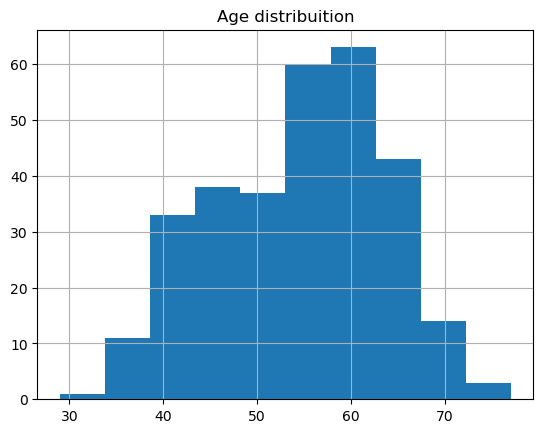

In [12]:
df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')

In the above graph, we can analyse the distribution of Age column, and we can say that there are 60+ people who are having age between 57 to 63.

C:\Users\Rishi\AppData\Local\Temp\ipykernel_4552\1140102936.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='female')
C:\Users\Rishi\AppData\Local\Temp\ipykernel_4552\1140102936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label

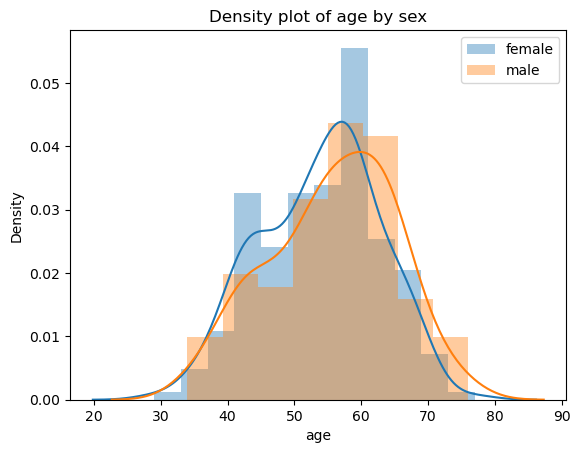

In [13]:
sns.distplot(df[df['sex']==1]['age'],  label='female')
sns.distplot(df[df['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

Density graph shows the smoothed distribution of points along the numerical axis. The density peaks where there is the highest concentration of points. In sum, density graphs can be considered smoothed histograms.

Text(0.5, 1.0, 'Resting Blood pressure distribuition')

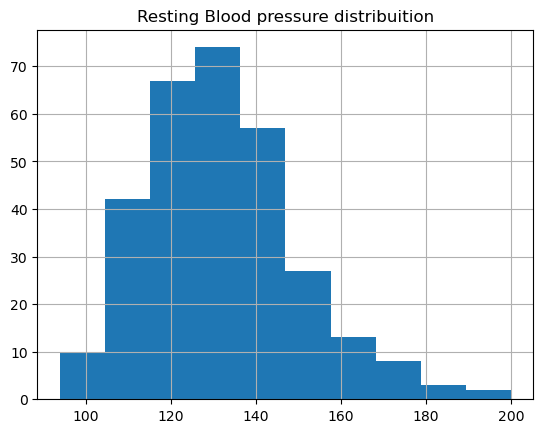

In [14]:
df['trestbps'].hist()
plt.title('Resting Blood pressure distribuition')

graph shows a right skew plot

C:\Users\Rishi\AppData\Local\Temp\ipykernel_4552\1317981768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trestbps'], bins=10)


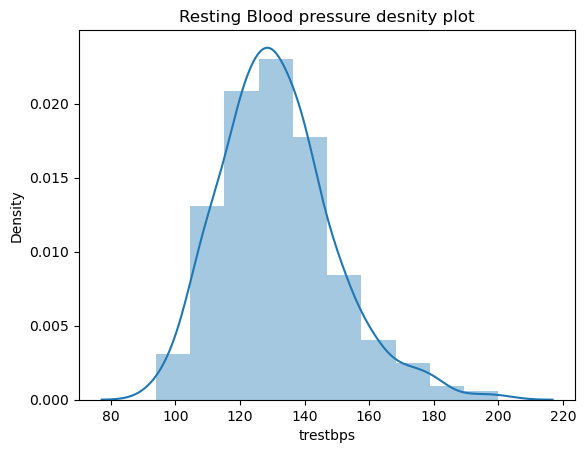

In [15]:
sns.distplot(df['trestbps'], bins=10)
plt.title('Resting Blood pressure desnity plot');

In the above grapgh, we are having a normal distribution

In [16]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram(df, x='trestbps', nbins=10, title='Resting Blood Pressure Distribution')
fig.show()


C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning:

Vertical orientation ignored with only `x` specified.



<Axes: xlabel='oldpeak'>

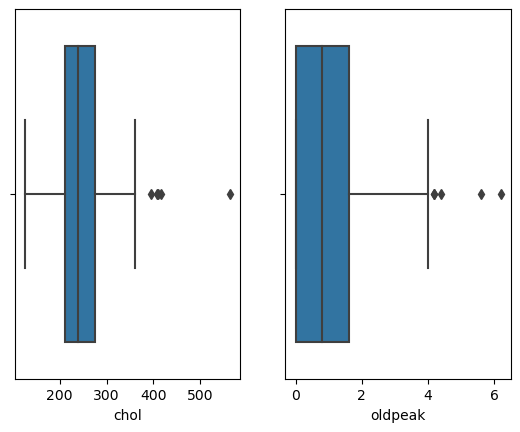

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df, orient='v', ax=axes[1])

In [18]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, y='chol', title='Cholesterol Boxplot')

# Add a new boxplot to the subplot
fig.add_box(y=df['oldpeak'], name='Oldpeak')


fig.show()
fig.write_html('plotly_grapgh.html')  #if you want to download the report in html format

In [19]:
import plotly.express as px

#assuming df is your DataFrame
fig = px.box(df, y='chol', title='Cholesterol Boxplot')

# Add a new Boxplot to the subplot
fig.add_box(y=df['oldpeak'], name='Oldpeak')

fig.show()

In [20]:
fruits=['apple','banana','orange','grapes']
for index,fruit in enumerate(fruits):
  #print(f'Index{index}: {fruit}')
  print(index,fruit)

0 apple
1 banana
2 orange
3 grapes


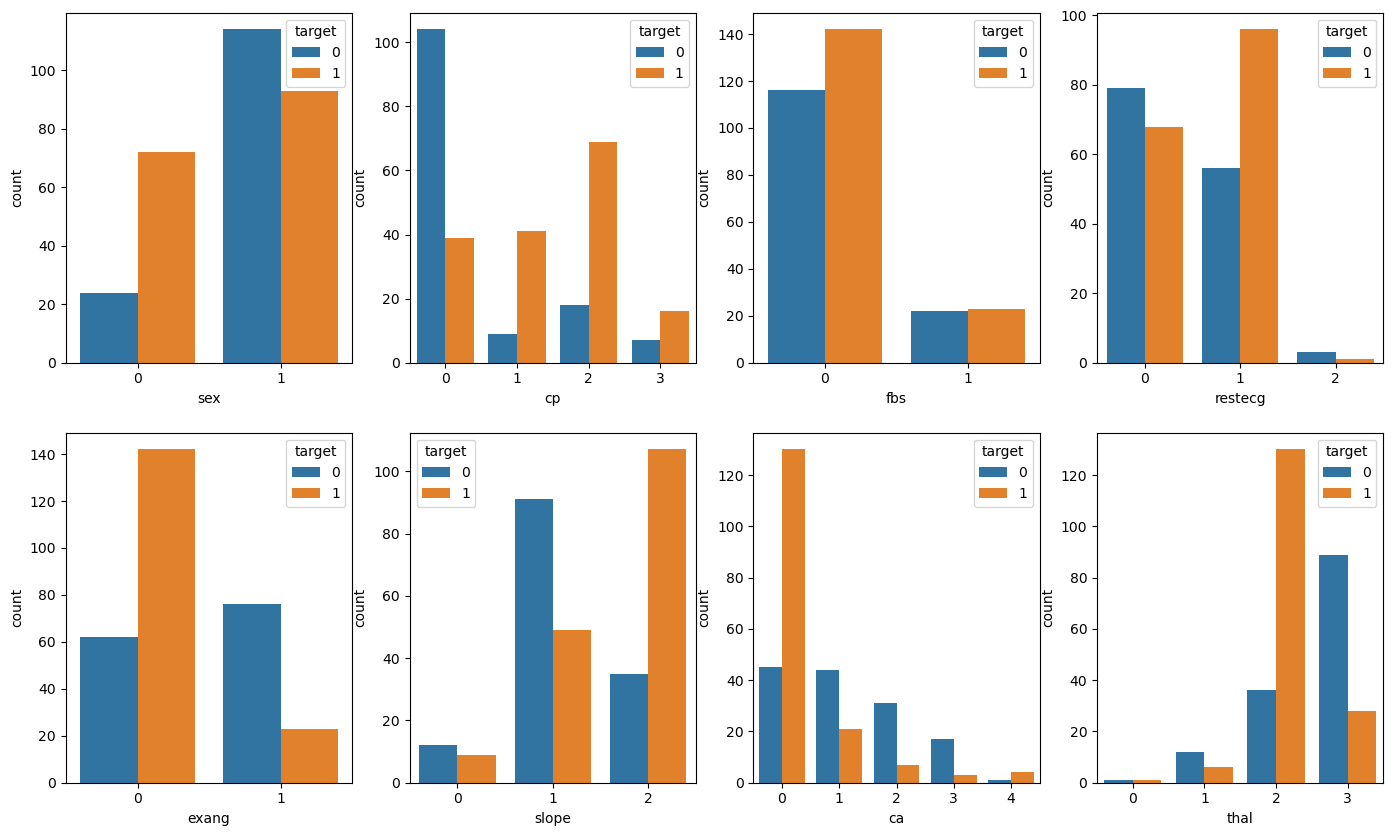

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]
        sns.countplot(x=feature, hue='target', data=df, ax=ax)

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Rishi\AppData\L

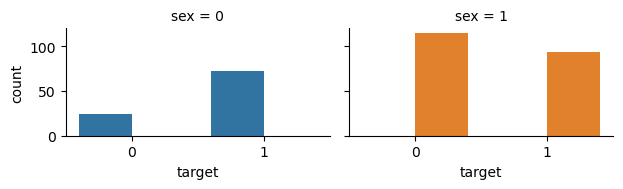

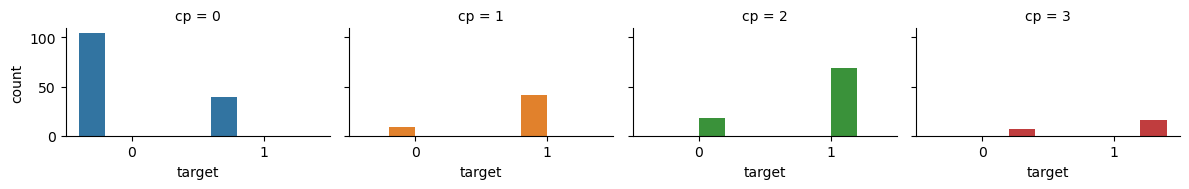

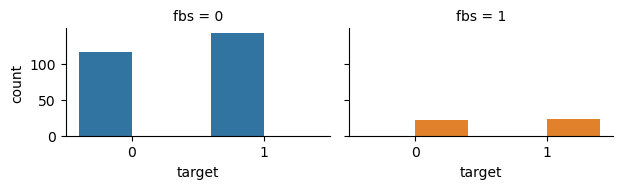

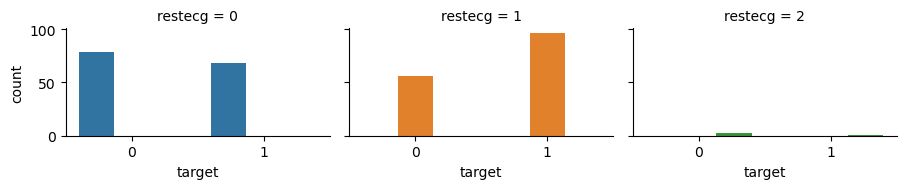

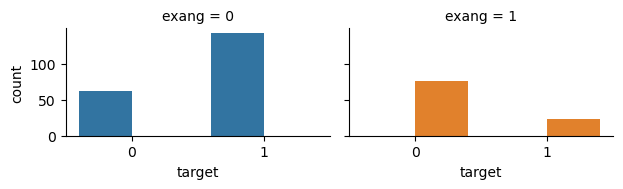

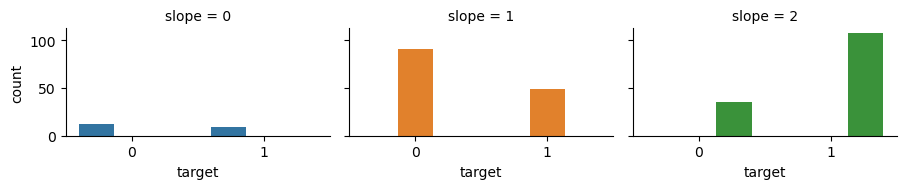

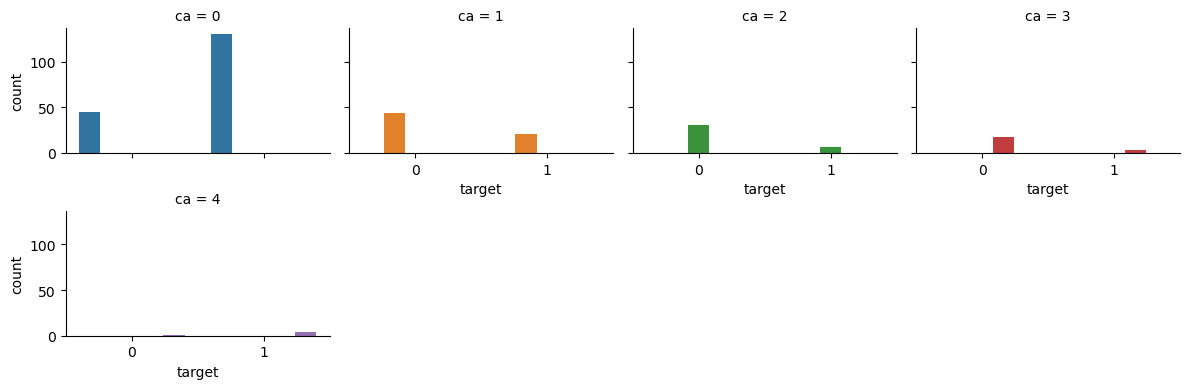

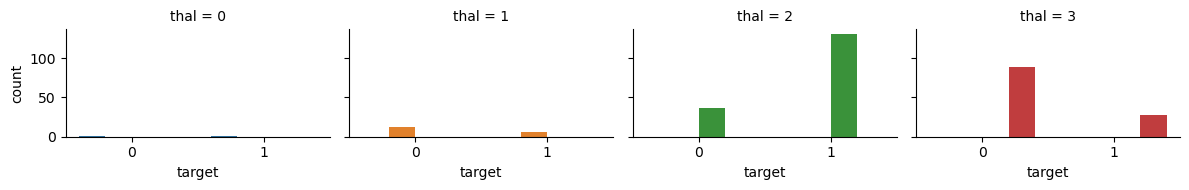

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a single row with 8 columns
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[0], col=cat_feat[0], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[1], col=cat_feat[1], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[2], col=cat_feat[2], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[3], col=cat_feat[3], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[4], col=cat_feat[4], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[5], col=cat_feat[5], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[6], col=cat_feat[6], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[7], col=cat_feat[7], col_wrap=4, height=2, aspect=1.5)

plt.tight_layout()
plt.show()

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

Text(0.5, 1.0, 'Count of target feature by sex')

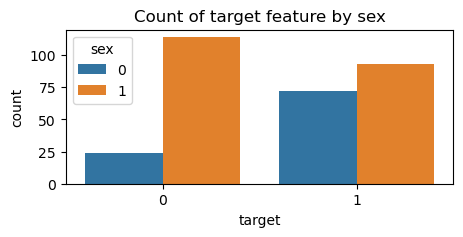

In [23]:
plt.rcParams['figure.figsize'] = (5,2)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

<Axes: >

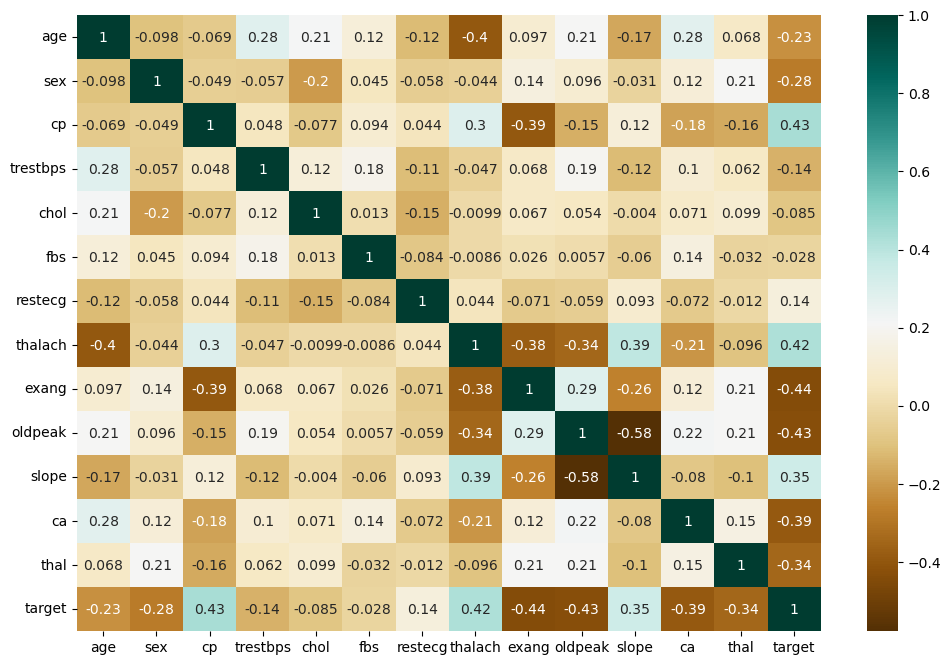

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='BrBG')

Apparently there are no features with a pretty strong correlation (above |0.7|)

# Shortcut of using eda

autovisualization

In [33]:
!pip install autoviz  

  Obtaining dependency information for autoviz from https://files.pythonhosted.org/packages/f2/68/29e6830a43b1742bc4f4ec0fc86548e7815079f7592b479754a9356ba899/autoviz-0.1.804-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     --------------------------------------- 0.0/18.5 MB 991.0 kB/s eta 0:00:19
     ---------------------------------------- 0.1/18.5 MB 2.1 MB/s eta 0:00:09
     ---------------------------------------- 0.2/18.5 MB 2.0 MB/s eta 0:00:10
      --------------------------------------- 0.3/18.5 MB 2.3 MB/s eta 0:00:09
      --------------------------------------- 0.4/18.5 MB 2.1 MB/s eta 0:00:09
     - -------------------------------------- 0.5/18.5 MB 2.1 MB/s eta 0:00:09
     - -------------------------------------- 0.6/18.5 MB 2.2 MB/s eta 0:00:09
     - -------------------------------------- 0.7/18.5 MB 2.1 MB/s eta 0:00:09
     - -------------------------------------- 0.7/18.5 MB 2.1 MB/s eta 0:00:09
     - --------

In [34]:
import pandas as pd 

data = pd.read_csv(r"C:\Users\Rishi\Downloads\heartt.csv")

In [35]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
report = AV.AutoViz(r"C:\Users\Rishi\Downloads\heartt.csv")

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (303, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Col

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


# one more lib

In [36]:
!pip install sweetviz 

  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 960.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/15.1 MB 1.3 MB/s eta 0:00:12
   ---------------------------------------- 0.1/15.1 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.3/15.1 MB 1.6 MB/s eta 0:00:10
    --------------------------------------- 0.4/15.1 MB 1.9 MB/s eta 0:00:08
   - -------------------------------------- 0.5/15.1 MB 2.2 MB/s eta 0:00:07
   - ------------------------------

sweetvisualzation

                                             |          | [  0%]   00:00 -> (? left)


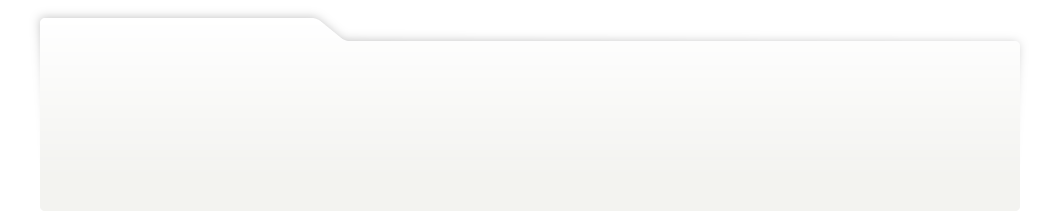
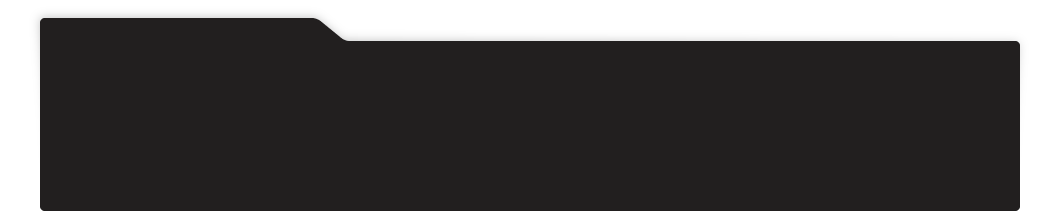
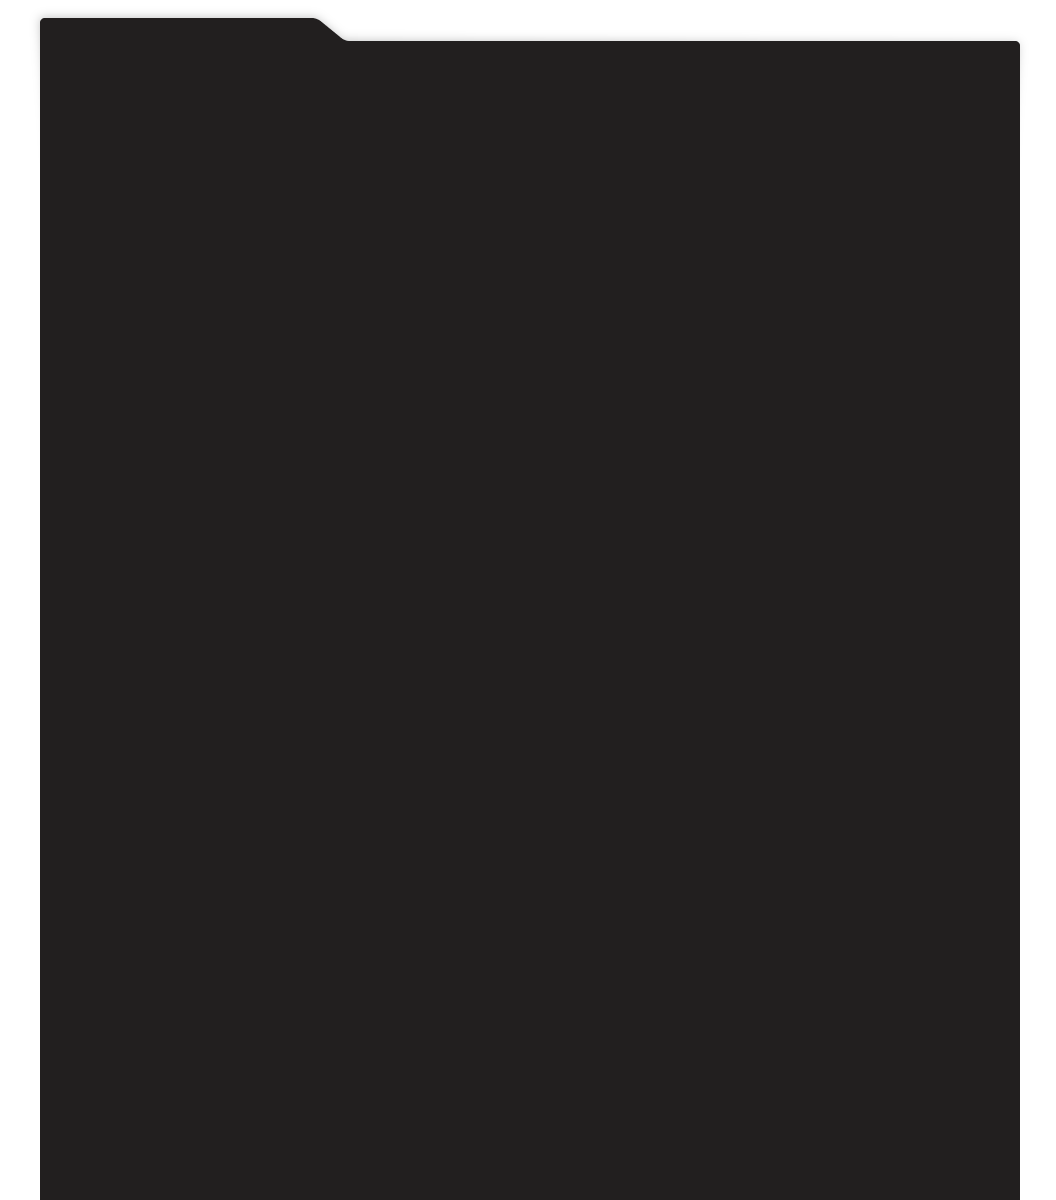
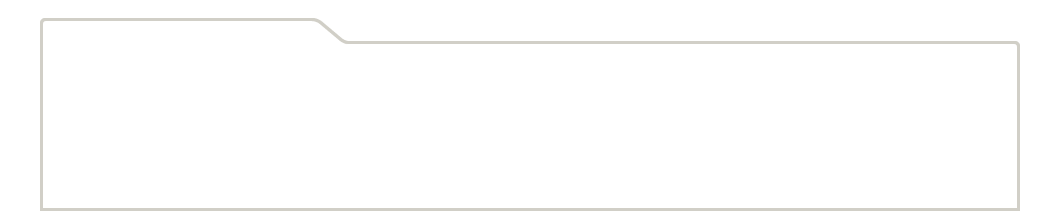
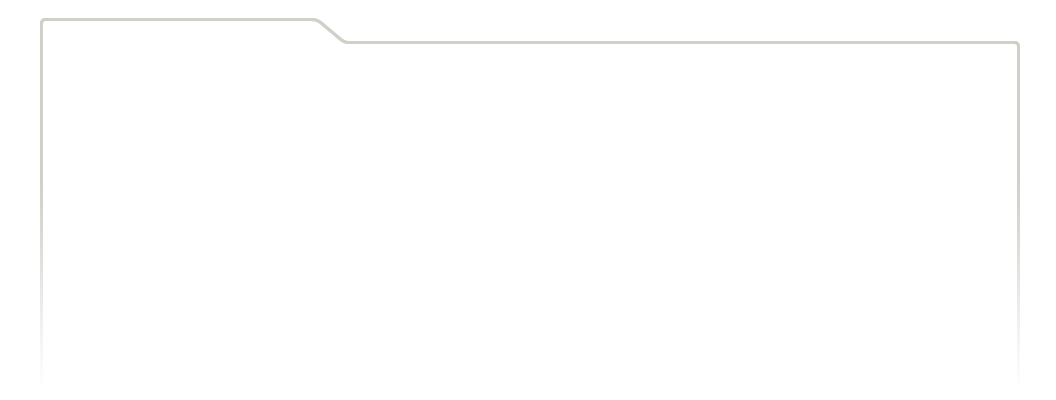
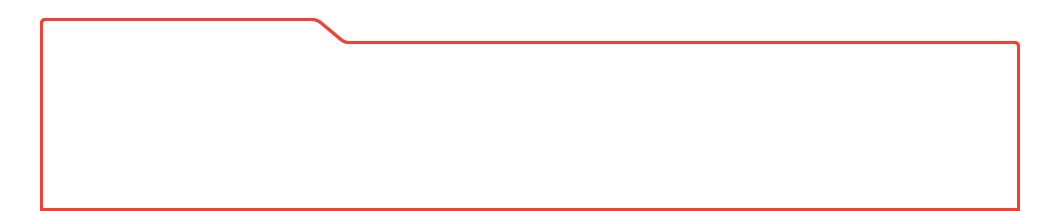
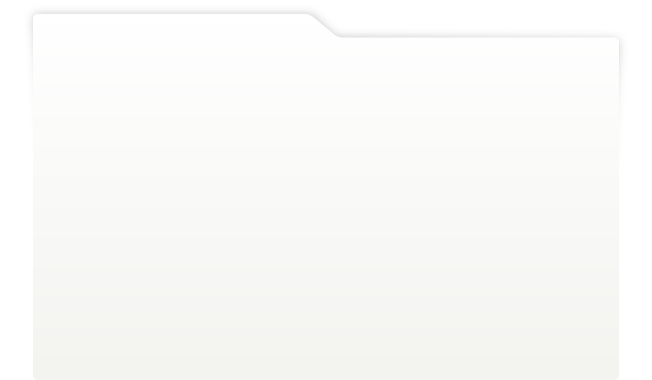
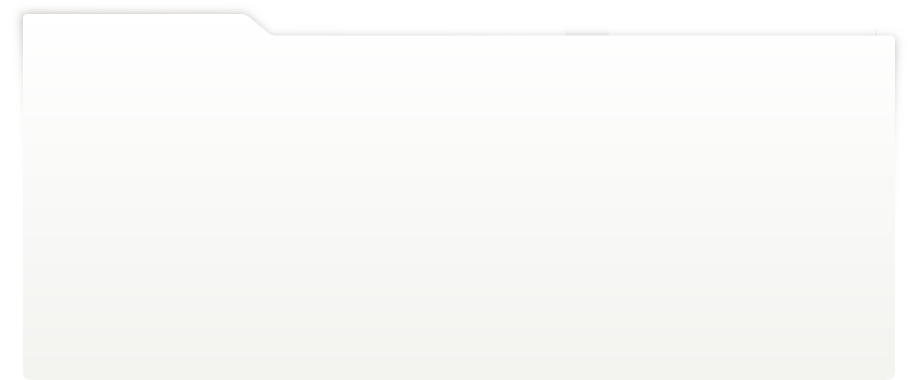
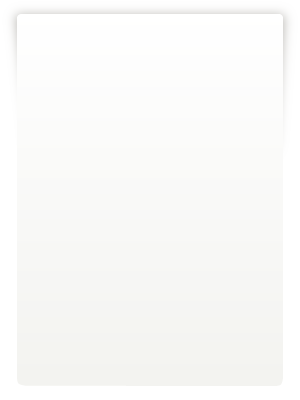
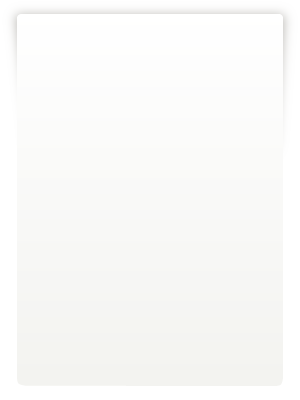
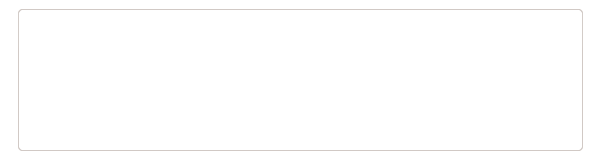
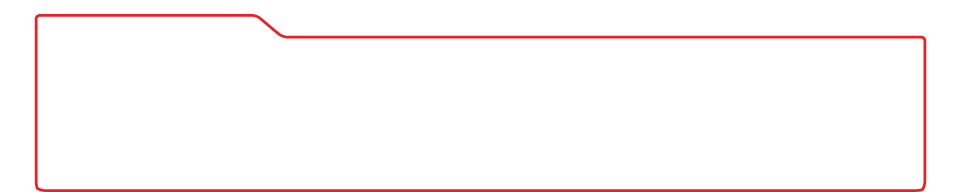
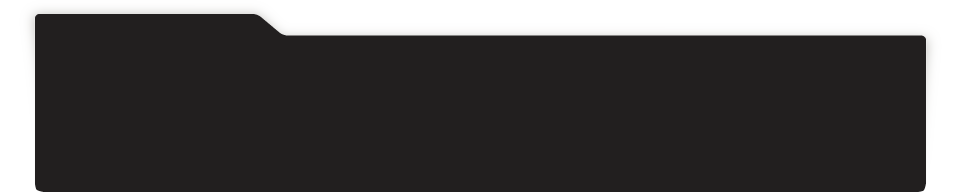
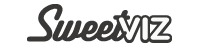
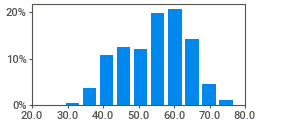
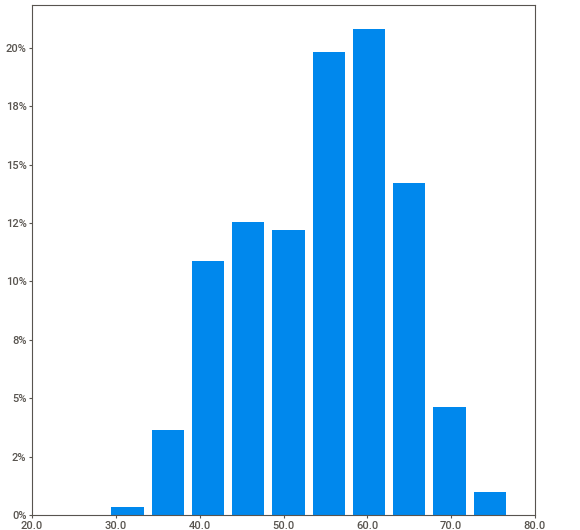
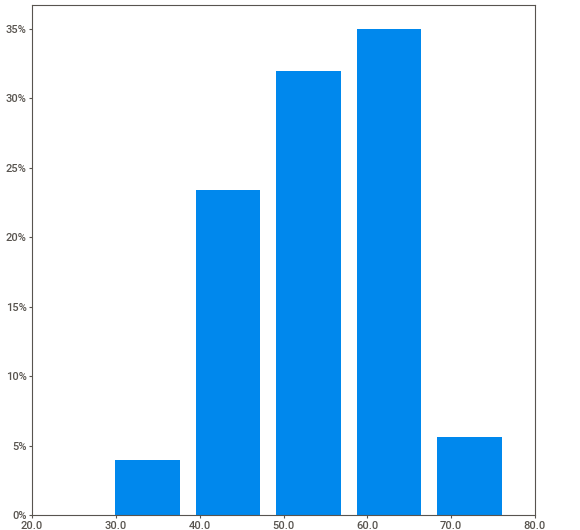
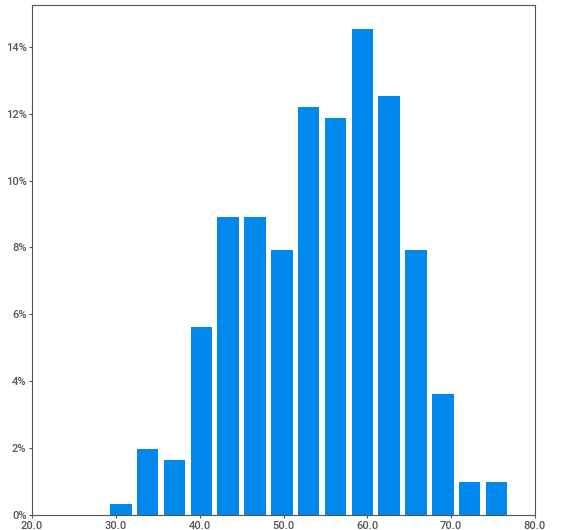
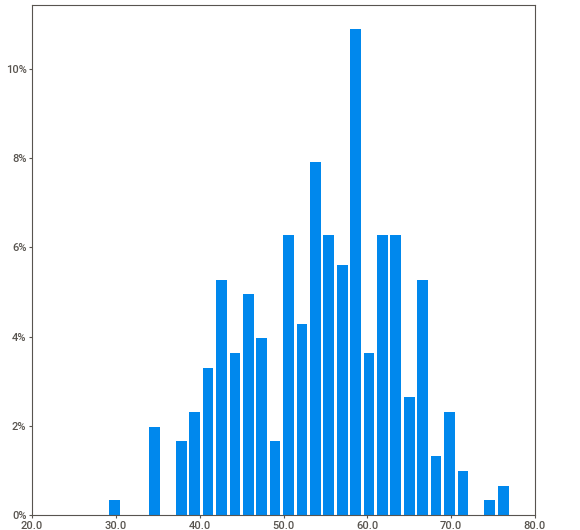
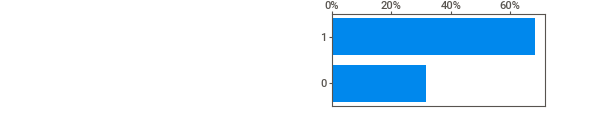
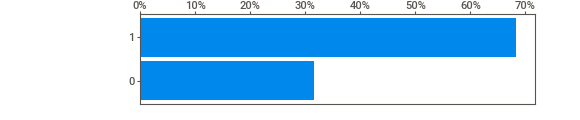
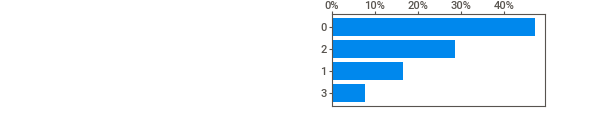
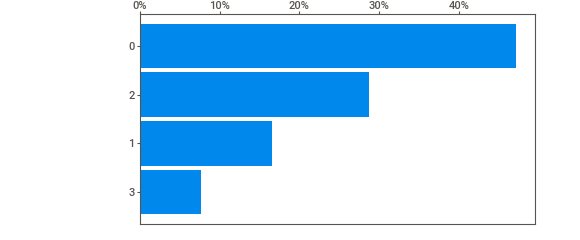
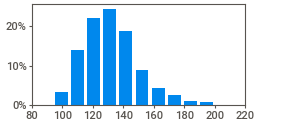
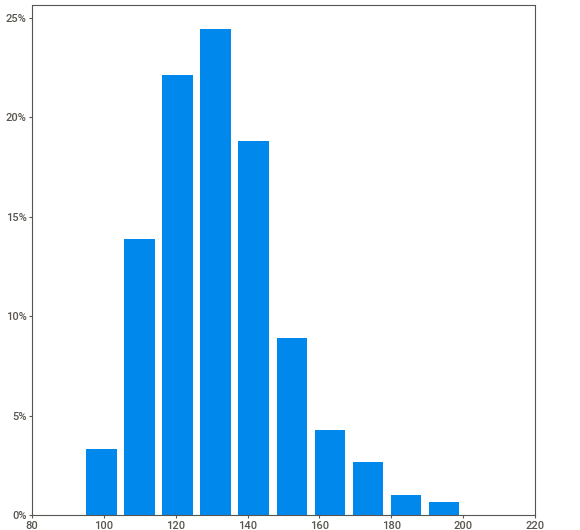
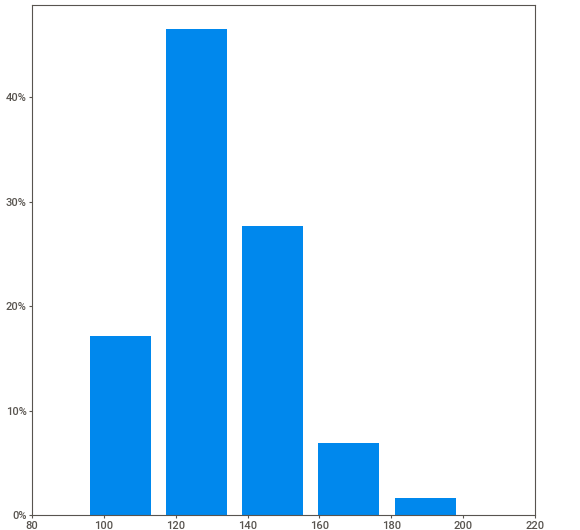
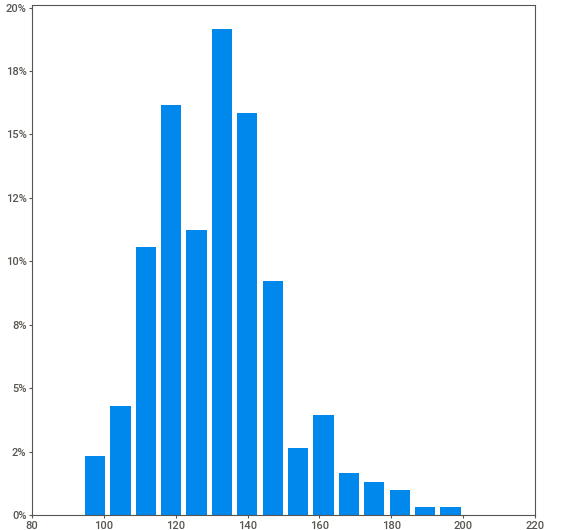
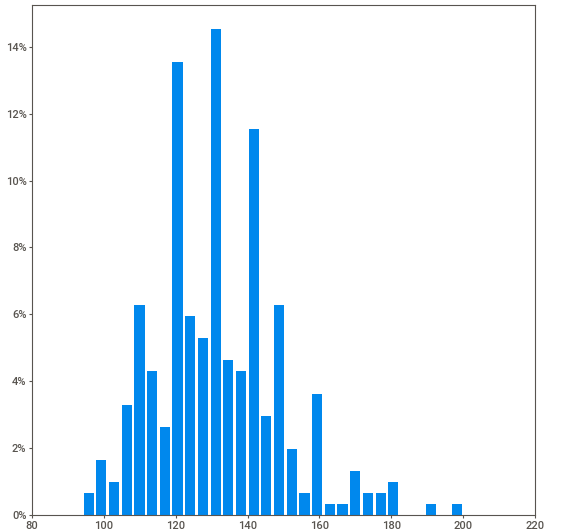
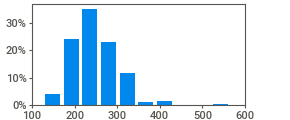
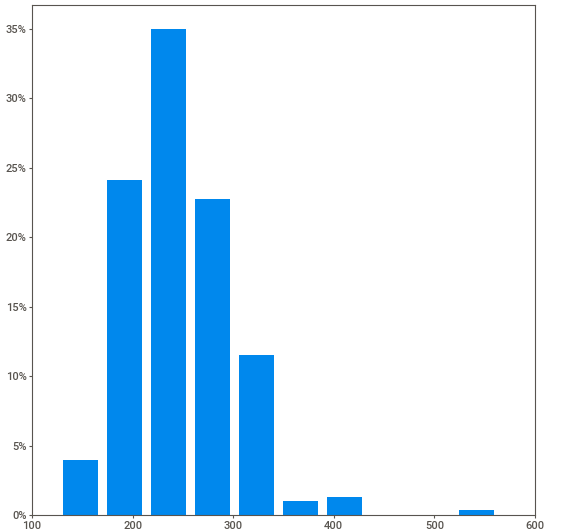
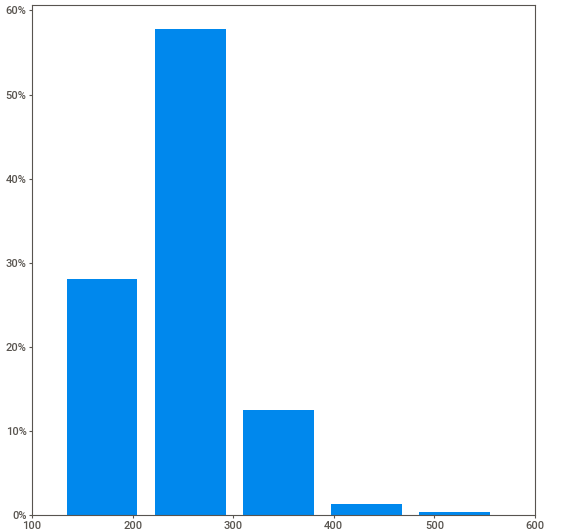
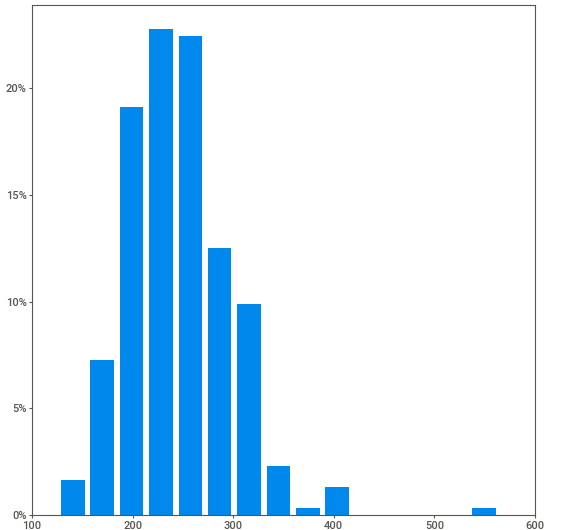
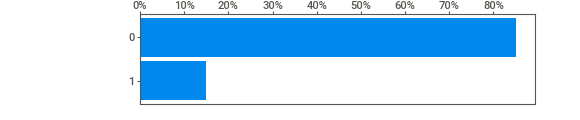
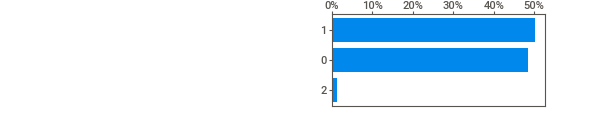
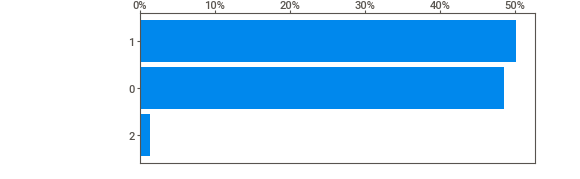
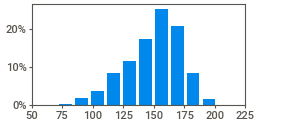
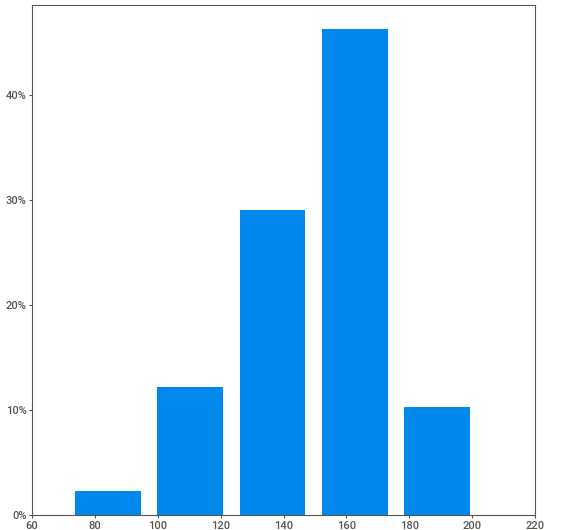
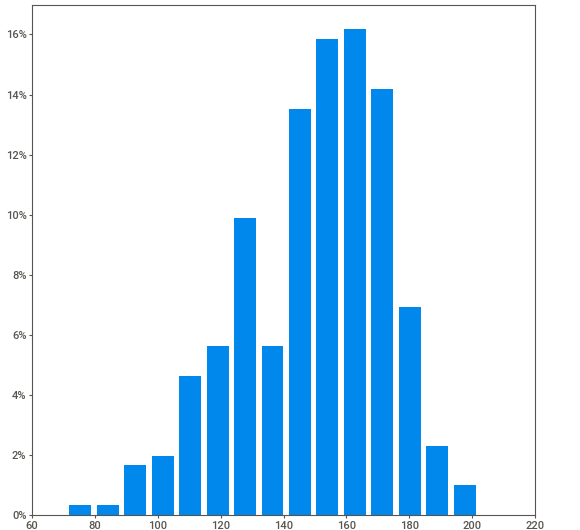
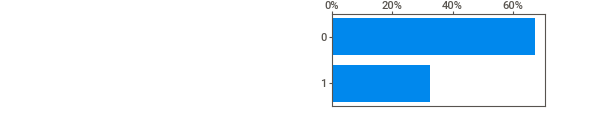
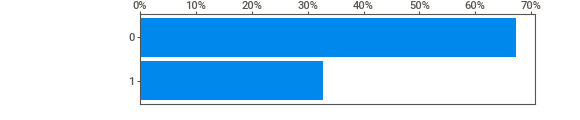
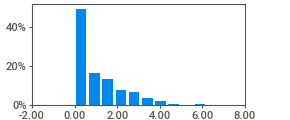
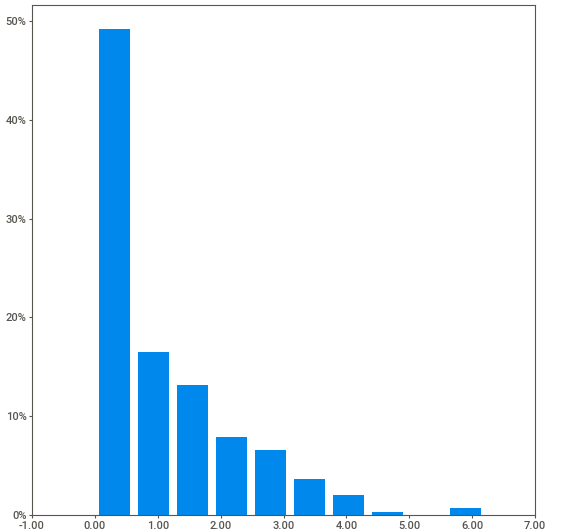
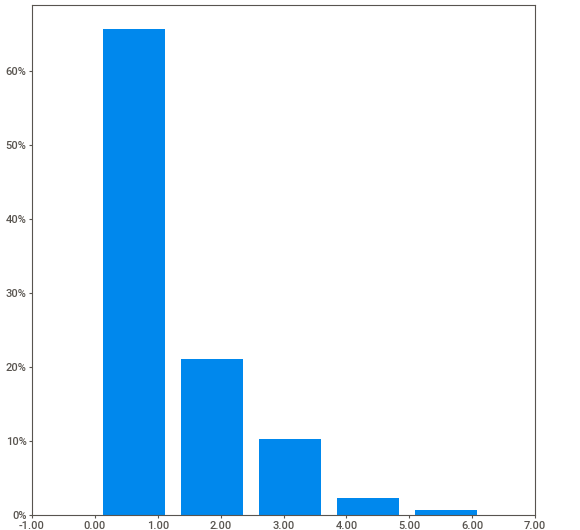
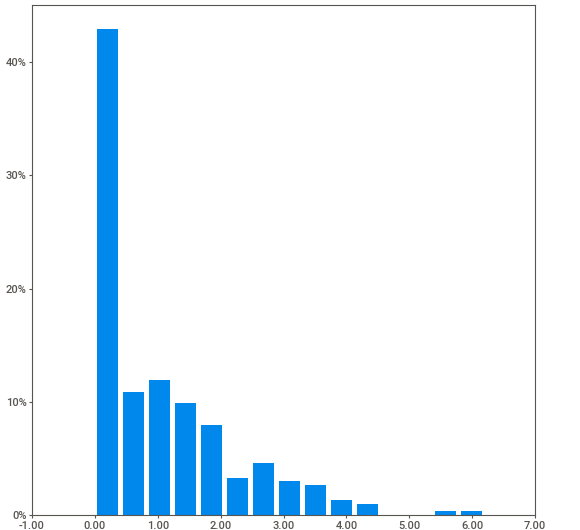
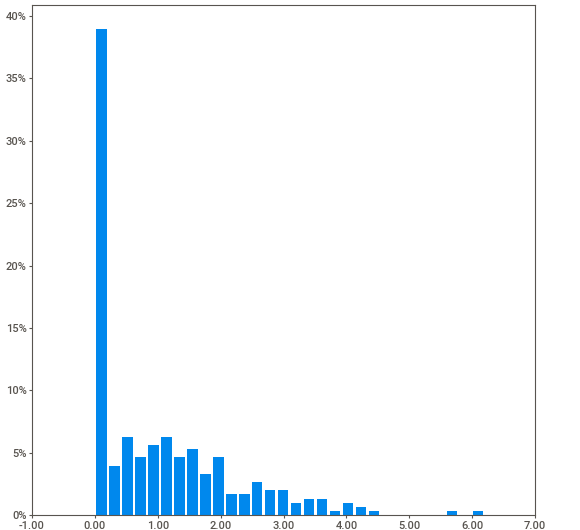
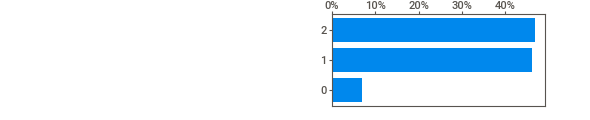
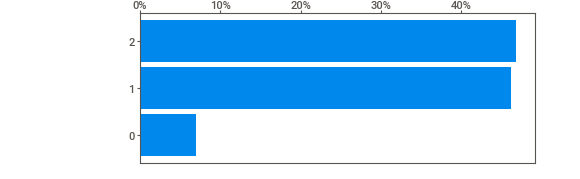
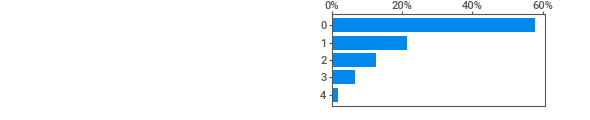
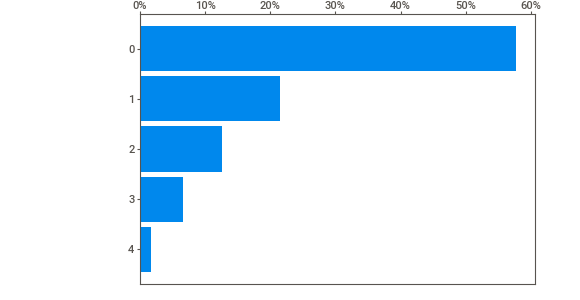
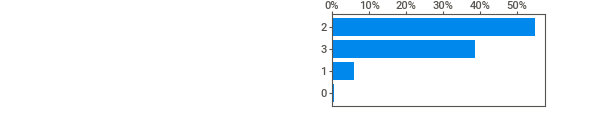
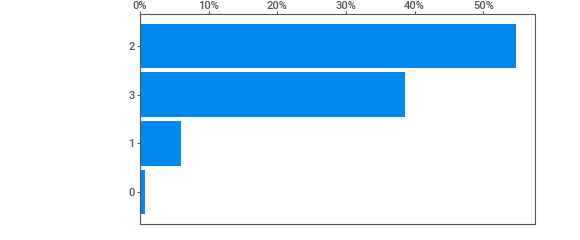
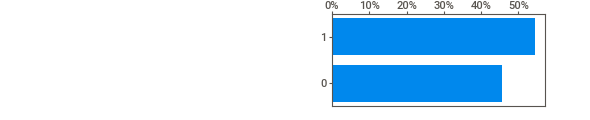
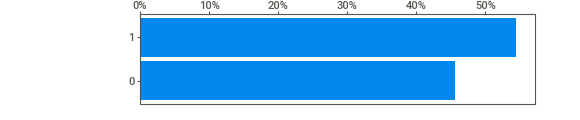
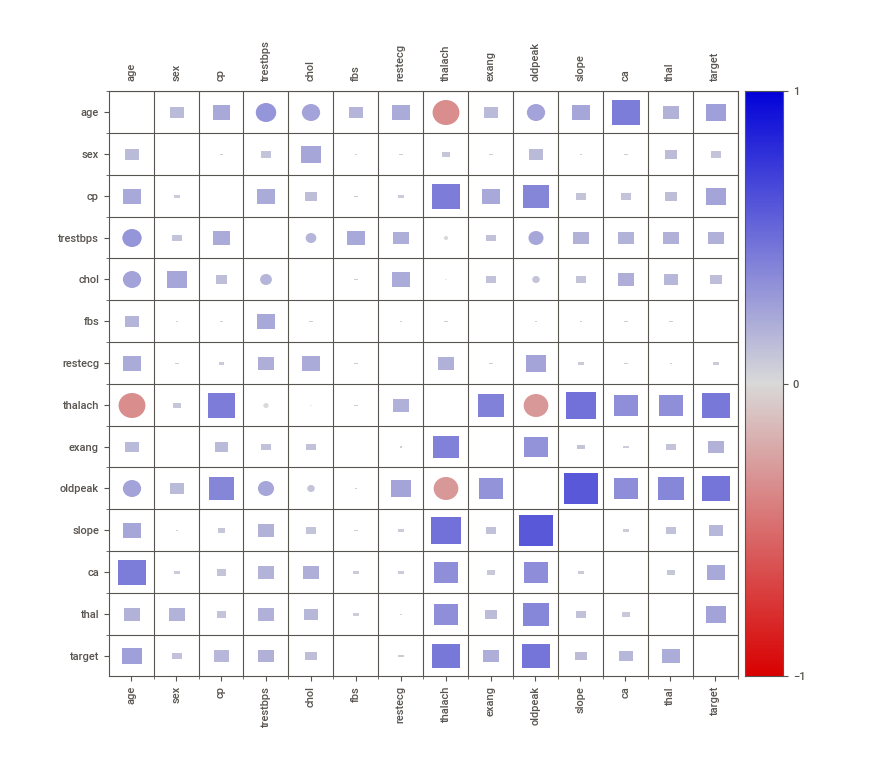
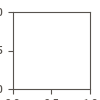

In [25]:
import pandas as pd
import sweetviz as sv

# Load your data
data = pd.read_csv(r"C:\Users\Rishi\Downloads\heartt.csv")

# Generate a Sweetviz report for the dataset
report = sv.analyze(data)

# Display the report in a Jupyter Notebook
report.show_notebook()

As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

In [26]:
X = df.drop(columns=['target'])#independent variable
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [27]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=8, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 13)
(91, 13)


In [30]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_train_pred = clf.predict(x_train) #checing for train prediction for overfitting and underfitting
y_test_pred = clf.predict(x_test)

In [32]:
y_train_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [33]:
y_test_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [34]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 1.0
Test score 0.7362637362637363


In [35]:
confusion_matrix(y_train_pred,y_train)

array([[100,   0],
       [  0, 112]], dtype=int64)

In [36]:
confusion_matrix(y_test_pred,y_test)

array([[30, 16],
       [ 8, 37]], dtype=int64)

In [37]:
(94+118)/(94+0+118+0)

1.0

In [38]:
(30+37)/(30+37+8+16)

0.7362637362637363

In [39]:
c_parameter_name = 'max_depth'
c_parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])

for input_parameter in c_parameter_values:
    model = tree.DecisionTreeClassifier(max_depth=input_parameter,splitter='best')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
print(df)
print("")

AttributeError: 'DataFrame' object has no attribute 'append'

In [40]:
model = tree.DecisionTreeClassifier(max_depth=3,splitter='best')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100

In [41]:
 y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [42]:
y_test

141    1
222    0
135    1
139    1
175    0
      ..
258    0
71     1
189    0
236    0
224    0
Name: target, Length: 91, dtype: int64

In [43]:
acc_score

76.92307692307693

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.64      0.71        47
           1       0.68      0.82      0.74        44

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.74      0.73      0.72        91



In [46]:
#recall->tp / (tp + fn)
#The recall is the measure of our model correctly identifying True Positives.
#Thus, for all the customers who actually have heart disease, recall tells us how many we correctly identified as a heart patient.

#precision of class 0 = TP of class 0/total number of object
#What is the Precision for our model? Yes, it is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.
#precision of class 1 = TP of class 1/total number of object

#macro average = (precision of class 0 + precision of class 1)/2

#weighted average is precision of all classes merge together
#weighted average = (TP of class 0 + TP of class 1)/(total number of class 0 + total number of class 1)

#F1-score is a measure of a model's accuracy on a dataset
#a good F1 score means that you have low false positives and low false negatives,
#Accuracy is used when the True Positives and True negatives are more important while
#F1-score is used when the False Negatives and False Positives are crucial.
#Support is the number of actual occurrences of the class in the specified dataset.

In [47]:
!pip install scikit-learn matplotlib graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00


In [48]:
import graphviz

In [49]:
y = y.astype(str)

In [50]:
class_names = y.unique()
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree visualization as a PDF or PNG file
graph.view("decision_tree")    # Open the tree visualization using the default viewer

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH